## **Horizontal Rotation of Seismograms**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import obspy 
from obspy import read
from obspy import UTCDateTime

This program allows to rotate seismograms in the horizontal plane, i.e. convert from N/S and E/W to radial (R) and transverse (T)

First step: Read, print file header and plot complete file
Assumption: SEED files contains three component data, hence three traces.

3 Trace(s) in Stream:
BK.BK63.00.HHE | 2020-10-15T07:55:09.500470Z - 2020-10-15T07:55:12.000470Z | 100.0 Hz, 251 samples
BK.BK63.00.HHN | 2020-10-15T07:55:09.500470Z - 2020-10-15T07:55:12.000470Z | 100.0 Hz, 251 samples
BK.BK63.00.HHZ | 2020-10-15T07:55:09.500470Z - 2020-10-15T07:55:12.000470Z | 100.0 Hz, 251 samples
         network: BK
         station: BK63
        location: 00
         channel: HHE
       starttime: 2020-10-15T07:55:09.500470Z
         endtime: 2020-10-15T07:55:12.000470Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 251
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'Q', 'number_of_records': 1, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 12288})
         network: BK
         station: BK63
        location: 00
         channel: HHN
       starttime: 2020-10-15T07:55:09.500470Z
         endtime: 2020-10-15T07:55:12.000470Z
   sampling_rate: 100.0
           delta: 0.01
    

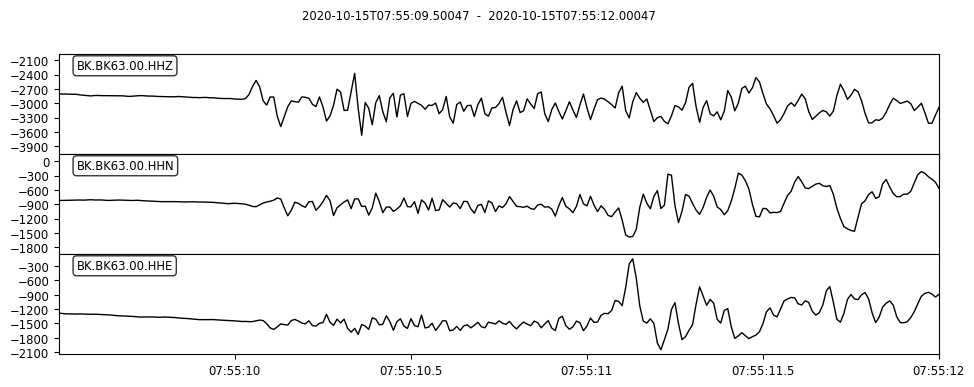

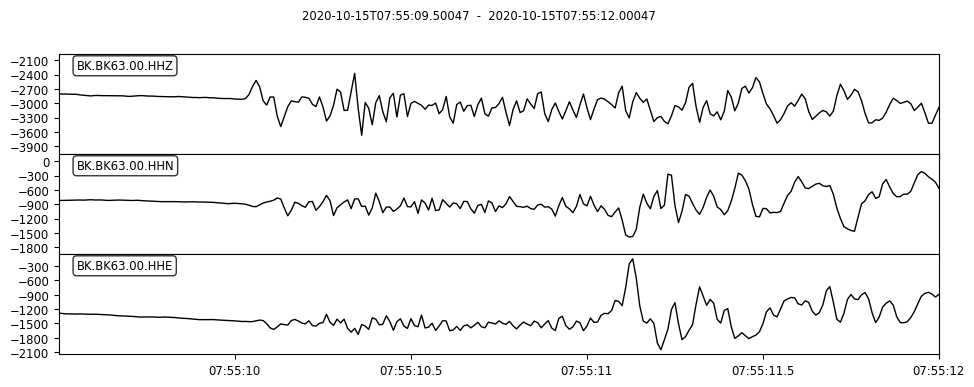

In [2]:
st = read("./../Instr Test/*Vollmer")
print(st.__str__(extended=True))

tr0=st[0]
tr1=st[1]
tr2=st[2]
print (tr0.stats)
print (tr1.stats)
print (tr2.stats)

#create overview plot of all traces over full length of file
st.plot(color='black',size=(1000,400),equal_scale=True)

Convert each EW- and NS-data point into R and T, using the rotation angle **phi** 

In [3]:
phi=int(input("Input rotation angle in degrees counted clockwise from N:"))
si=np.sin(phi)
cs=np.cos(phi)

t=np.zeros(st[0].stats.npts)
Z=np.zeros(st[0].stats.npts)
R=np.zeros(st[0].stats.npts)
T=np.zeros(st[0].stats.npts)


EW=st[0].data
NS=st[1].data
Z=st[2].data

for i in range (st[0].stats.npts):
    t[i]=i/100
    R[i]=NS[i]*cs+EW[i]*si
    T[i]=-NS[i]*si+EW[i]*cs



Input rotation angle in degrees counted clockwise from N: 54


Plot Z-comp plus the two rotated components

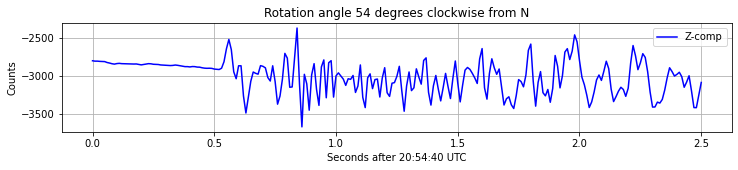

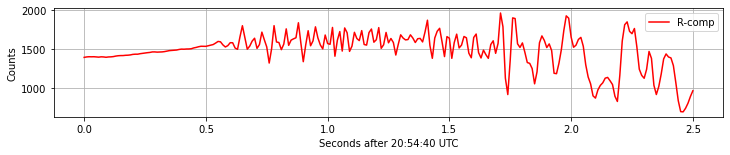

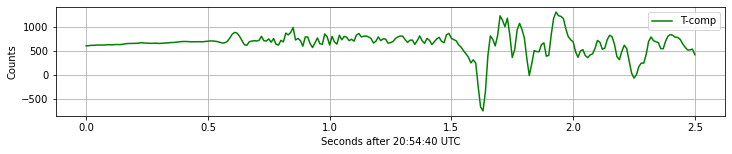

In [4]:
begin=st[0].stats.starttime

plt.rcParams['figure.figsize'] = [12, 2]
plt.title ("Rotation angle 54 degrees clockwise from N")
plt.plot (t,Z,label="Z-comp",color="blue")
plt.ylabel('Counts')
plt.xlabel("Seconds after 20:54:40 UTC")
plt.grid()
plt.legend()
plt.show()

plt.plot (t,R,label="R-comp",color="red")
plt.ylabel('Counts')
plt.xlabel("Seconds after 20:54:40 UTC")
plt.grid()
plt.legend()
plt.show()

plt.plot (t,T,label="T-comp",color="green")
#plt.ylim(-150000, 150000)
plt.ylabel('Counts')
plt.xlabel("Seconds after 20:54:40 UTC")
plt.grid()
plt.legend()
plt.show()